In [1]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

/home/spencerj/.conda/envs/base2/envs/test_gcm_filters/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39456 instead
  warnings.warn(


In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import os
import gcm_filters
import xrft
from dask.diagnostics import ProgressBar
from rechunker import rechunk
import zarr

In [51]:
eta_merged = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_smoothed.zarr')
eta_merged = eta_merged.isel(time=slice(1,1800))

In [55]:
unfiltered_ps = xrft.power_spectrum(eta_merged.eta.chunk({'time':-1}).drop_vars('time'),dim=['time'],window=True)

/home/spencerj/.conda/envs/base2/envs/test_gcm_filters/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


(0.005, 0.5)

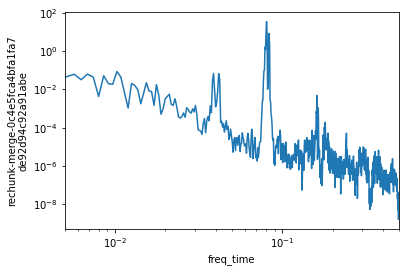

In [57]:
#filtered_ps[292:,920:-920,850:-850].mean(['i','j']).plot()
unfiltered_ps[292:,920:-920,850:-850].mean(['i','j']).plot()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.005,0.5)

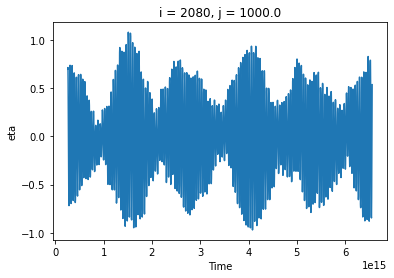

In [60]:
eta_merged.eta.isel(i=1000,j=1000).plot()

In [15]:
eta_28 = eta_merged.isel(time=slice(0,2000,3))

In [16]:
#write to zarr so we can rechunk into time
eta_28.to_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_28_smoothed.zarr')

# Rechunk in time so that tide fitting is easier

In [47]:
source = zarr.open('/swot/SUM02/spencer/swot_agulhas_surf/eta_long.zarr')
intermediate = "/swot/SUM02/spencer/swot_agulhas_surf/intermediate.zarr"
target = "/swot/SUM02/spencer/swot_agulhas_surf/eta_timechunks.zarr"

In [48]:
target_chunks = {
    'eta': {'time':1751,'j':180,'i':180},
    'x': {'i':180, 'j':180},
    'y': {'i':180, 'j':180},
    'time': None, # don't rechunk this array
    'iter': None,
    'i': None,
    'j': None,
}

In [49]:
rechunked = rechunk(source, target_chunks=target_chunks,target_store=target,max_mem='800MB',temp_store=intermediate)

In [50]:
rechunked.execute();

_copy_chunk((slice(0, 21, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(21, 42, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(42, 63, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(63, 84, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(84, 105, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(105, 126, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(126, 147, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(147, 168, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(168, 189, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(189, 210, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(210, 231, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(231, 252, None), slice(0, 2160, None), slice(0, 2160, None)))
_copy_chunk((slice(252, 273, None), sl

In [2]:
#source = zarr.open('/swot/SUM02/spencer/swot_agulhas_surf/eta_28_smoothed.zarr')
source = zarr.open('/swot/SUM02/spencer/swot_agulhas_surf/eta_28.zarr')
intermediate = "/swot/SUM02/spencer/swot_agulhas_surf/intermediate.zarr"
#target = "/swot/SUM02/spencer/swot_agulhas_surf/eta_28times.zarr"
target = "/swot/SUM02/spencer/swot_agulhas_surf/eta_28time.zarr"

In [3]:
target_chunks = {
    'Eta': {'time':584,'j':180,'i':180},
    'x': {'i':180, 'j':180},
    'y': {'i':180, 'j':180},
    'time': None, # don't rechunk this array
    'iter': None,
    'i': None,
    'j': None,
}

In [4]:
rechunked = rechunk(source, target_chunks=target_chunks,target_store=target,max_mem='800MB',temp_store=intermediate)

In [5]:
rechunked.execute();

_copy_chunk((slice(0, 411, None), slice(0, 270, None), slice(0, 1800, None)))
_copy_chunk((slice(0, 411, None), slice(0, 270, None), slice(1800, 2160, None)))
_copy_chunk((slice(0, 411, None), slice(270, 540, None), slice(0, 1800, None)))
_copy_chunk((slice(0, 411, None), slice(270, 540, None), slice(1800, 2160, None)))
_copy_chunk((slice(0, 411, None), slice(540, 810, None), slice(0, 1800, None)))_copy_chunk((slice(0, 411, None), slice(540, 810, None), slice(1800, 2160, None)))
_copy_chunk((slice(0, 411, None), slice(810, 1080, None), slice(0, 1800, None)))

_copy_chunk((slice(0, 411, None), slice(810, 1080, None), slice(1800, 2160, None)))_copy_chunk((slice(0, 411, None), slice(1080, 1350, None), slice(0, 1800, None)))
_copy_chunk((slice(0, 411, None), slice(1080, 1350, None), slice(1800, 2160, None)))

_copy_chunk((slice(0, 411, None), slice(1350, 1620, None), slice(0, 1800, None)))
_copy_chunk((slice(0, 411, None), slice(1350, 1620, None), slice(1800, 2160, None)))
_copy_chunk((sli

In [9]:
#eta_28 = xr.open_zarr("/swot/SUM02/spencer/swot_agulhas_surf/eta_28times.zarr")
eta_28 = xr.open_zarr("/swot/SUM02/spencer/swot_agulhas_surf/eta_28time.zarr")
eta_28 = eta_28.assign_coords({'time':eta_28.time/10**9/3600})
eta_detrend = eta_28.Eta - eta_28.Eta.rolling(time=8).mean()
#eta_detrend.to_dataset(name='eta').to_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_28detrends8.zarr')
eta_detrend.to_dataset(name='eta').to_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_28detrend8.zarr')

# Start here to restart

In [5]:
#eta_detrend = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_28detrends8.zarr').eta
eta_detrend = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_28detrend8.zarr').eta

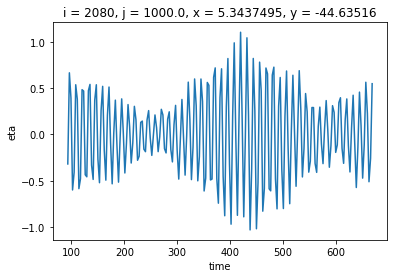

In [6]:
eta_detrend.isel(i=1000,j=1000,time=slice(0,200)).plot()

In [7]:
m2=12.4206012
s2=12
n2=12.65834751
k2=11.96723606
k1=23.93447213
o1=25.81933871
q1=26.868350
p1=24.06588766
#o1 is still really hard to fit in many locations. p1 too and it's very small. I have also stopped fitting k2 because it's too close to s2

def sinusoid_check(time, a=0.004,b=0.5,c=1.3,d=0.1,e=4,f=0.1,g=0.1,h=0.1,k=0.1,l=0.1,m=0.1,n=0.1,o=0.1):#,p=0.1,q=0.1,r=0.1,s=0.1):#):#,h=0.1,k=0.1,r=0.1,s=0.1):
    return (a+b*np.sin(time*2*np.pi/m2+c)+d*np.sin(time*2*np.pi/s2+e)+f*np.sin(time*2*np.pi/k1+g)+h*np.sin(time*2*np.pi/o1+k)
       + l*np.sin(time*2*np.pi/n2+m)+n*np.sin(time*2*np.pi/k2+o))#+p*np.sin(time*2*np.pi/q1+q))#+r*np.sin(time*2*np.pi/p1+s))


In [6]:
check_it = (eta_detrend).chunk({'time': -1}).isel(i=slice(500,1000),j=1000,time=slice(18,2000)).curvefit('time',sinusoid_check,
                                                                              bounds={"b": (0, 2),"d": (0, 2),"f": (0, 1),"h": (0, 1),"l": (0, 1),"n": (0, 1),"p": (0, 1),"r": (0, 1)})


In [ ]:
for ii in range(0,216):
    print(ii)
    test_curvefit = eta_detrend.chunk({'time':-1}).isel(i=slice(ii*10,ii*10+10),time=slice(24,-24)).curvefit('time',sinusoid_check,
                                                                              bounds={"b": (0, 2),"d": (0, 2),"f": (0, 1),"h": (0, 1),"l": (0, 1),"n": (0, 1)})#,"p": (0, 1),"r": (0, 1)})#,"o": (0, 2*np.pi),"k": (0, 2*np.pi)
    test_curvefit.curvefit_coefficients.to_dataset().to_zarr('/swot/SUM02/spencer/swot_agulhas_surf/curvefit_28_uns.zarr',append_dim='i')

0
1


In [2]:
#coeffs = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/curvefit_28_de.zarr').isel(i=slice(10,2170))
coeffs = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/curvefit_28_uns.zarr').isel(i=slice(10,2170))

In [3]:
coeffs.param

<xarray.DataArray 'param' (param: 13)>
array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o'],
      dtype='<U1')
Coordinates:
  * param    (param) <U1 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'k' 'l' 'm' 'n' 'o'

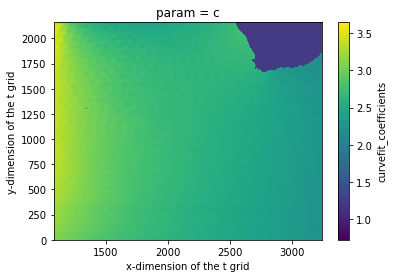

In [4]:
coeffs.curvefit_coefficients.sel(param='c').plot(x='i',y='j')

In [8]:
new_object=xr.DataArray(np.arange(72,1822,3),dims=['time'],coords={'time':eta_detrend.time})
new_object = new_object*xr.ones_like(eta_detrend)

In [9]:
tide_est = xr.apply_ufunc(sinusoid_check,new_object,coeffs.curvefit_coefficients.sel(param='a'),coeffs.curvefit_coefficients.sel(param='b'),
              coeffs.curvefit_coefficients.sel(param='c'),coeffs.curvefit_coefficients.sel(param='d'),
              coeffs.curvefit_coefficients.sel(param='e'),coeffs.curvefit_coefficients.sel(param='f'),
              coeffs.curvefit_coefficients.sel(param='g'),coeffs.curvefit_coefficients.sel(param='h'),
              coeffs.curvefit_coefficients.sel(param='k'),
                          coeffs.curvefit_coefficients.sel(param='l'),
              coeffs.curvefit_coefficients.sel(param='m'),coeffs.curvefit_coefficients.sel(param='n'),
                        coeffs.curvefit_coefficients.sel(param='o'),#check_it.curvefit_coefficients.sel(param='p'),
                      #  check_it.curvefit_coefficients.sel(param='q'),check_it.curvefit_coefficients.sel(param='r'),
                      #  check_it.curvefit_coefficients.sel(param='s')
            dask='allowed')

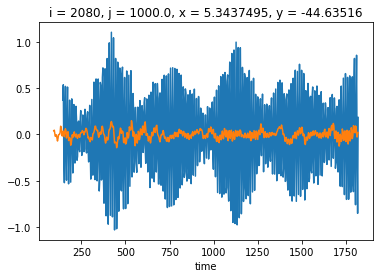

In [10]:
eta_detrend.isel(i=1000,j=1000,time=slice(24,1000)).plot()
(eta_detrend.isel(i=1000,j=1000)-tide_est.isel(i=1000,j=1000)).plot()
#tide_est.isel(i=1000,j=1000).plot()

In [70]:
eta_de_vs = (eta_detrend-tide_est).isel(time=slice(24,1000))

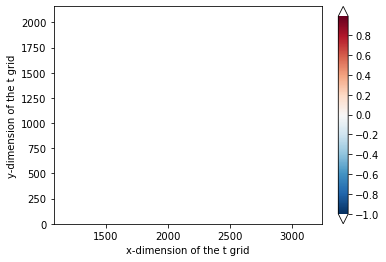

In [69]:
eta_de_vs.drop_vars('time').isel(time=20).plot.pcolormesh(x='i',y='j',levels=np.arange(-1,1,0.01),rasterized=True,cbar_kwargs={'extend':'both'})

In [72]:
#ffmpeg -r 60 -f image2 -i fig%03d.jpg -vcodec libx264 -crf 25 -pix_fmt yuv420p vel.mp4
plt.figure(figsize=(8,5))
for tt in range(1,300):
    plt.clf()
    eta_de_vs.drop_vars('time').isel(time=tt).plot.pcolormesh(x='i',y='j',levels=np.arange(-1,1,0.01),rasterized=True,cbar_kwargs={'extend':'both'})
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('time = ' + '{0:.2f}'.format((eta_de_vs.time.values[tt]-eta_de_vs.time.values[1]).item()/24)+ 'days')
    plt.tight_layout()
    
    fig = plt.gcf()
    fig.savefig("/home/spencerj/agulhas-offline/movie/eta1/fig{:03d}.jpg".format(tt))

KeyboardInterrupt: 

<Figure size 576x360 with 0 Axes>

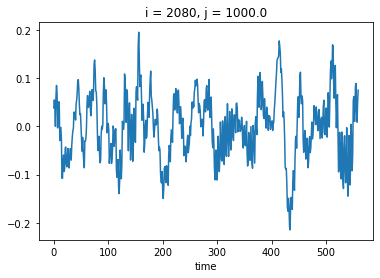

In [16]:
(eta_detrend.isel(i=1000,j=1000,time=slice(24,1000))-tide_est.isel(i=1000,j=1000,time=slice(0,-24))).plot()

In [3]:
eta_28 = xr.open_zarr("/swot/SUM02/spencer/swot_agulhas_surf/eta_28time.zarr")

In [97]:
eta_28.time

<xarray.DataArray 'time' (time: 584)>
array([ 259200000000000,  270000000000000,  280800000000000, ...,
       6534000000000000, 6544800000000000, 6555600000000000],
      dtype='timedelta64[ns]')
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 3 days 00:00:00 ... 75 days 21:00:00
Attributes:
    axis:           T
    calendar:       gregorian
    long_name:      Time
    standard_name:  time

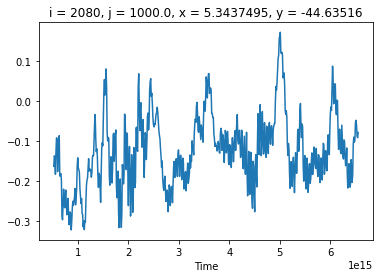

In [18]:
(eta_28.Eta.isel(i=1000,j=1000,time=slice(24,1000))-tide_est.isel(i=1000,j=1000,time=slice(0,-24))).plot()

In [19]:
unfiltered_ps = xrft.power_spectrum(eta_28.Eta.drop_vars('time'),dim=['time'])
filtered_ps = xrft.power_spectrum(eta_28.Eta.isel(time=slice(24,1000)).drop_vars('time')-tide_est.isel(time=slice(0,-24)),dim=['time'])

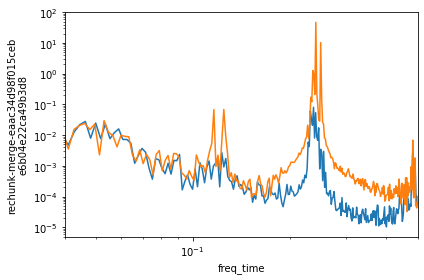

In [20]:
filtered_ps[292:,920:-920,850:-850].mean(['i','j']).plot()
unfiltered_ps[292:,920:-920,850:-850].mean(['i','j']).plot()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.04,0.5)

plt.tight_layout()
fig=plt.gcf()
fig.savefig('remove_s2_n2_m2.png')

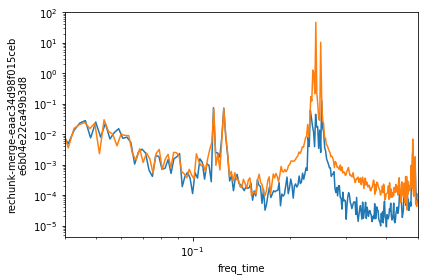

In [37]:
filtered_ps[292:,920:-920,850:-850].mean(['i','j']).plot()
unfiltered_ps[292:,920:-920,850:-850].mean(['i','j']).plot()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.04,0.5)

plt.tight_layout()
fig=plt.gcf()
fig.savefig('remove_s2_n2_m2.png')

# Now try with full timeseries (not 3hrly)

In [61]:
eta_timechunks = xr.open_zarr("/swot/SUM02/spencer/swot_agulhas_surf/eta_timechunks.zarr")
eta_timechunks =eta_timechunks.assign_coords({'time':eta_timechunks.time/10**9/3600})

In [7]:
eta_28detrend = xr.open_zarr("/swot/SUM02/spencer/swot_agulhas_surf/eta_28detrends8.zarr")

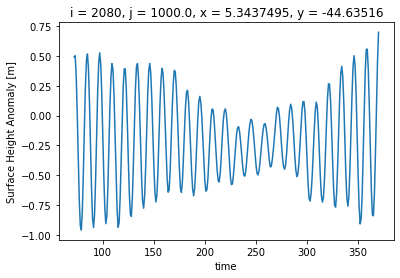

In [15]:
eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(0,300)).plot()
#eta_28detrend.Eta.isel(i=1000,j=1000).isel(time=slice(0,100)).plot()

In [17]:
eta_timechunks.time

<xarray.DataArray 'time' (time: 1752)>
array(['NaT',    72,    73, ...,  1820,  1821,  1822], dtype='timedelta64[ns]')
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] NaT ... 00:00:00.000001822

In [62]:
new_object=xr.DataArray(np.arange(71, 1823),dims=['time'])
new_object = new_object*xr.ones_like(eta_timechunks.Eta)
new_object = new_object

In [63]:
m2=12.4206012
s2=12
n2=12.65834751
k2=11.96723606
k1=23.93447213
o1=25.81933871
q1=26.868350
p1=24.06588766
#o1 is still really hard to fit in many locations. p1 too and it's very small. I have also stopped fitting k2 because it's too close to s2

def sinusoid_check(time, a=0.004,b=0.5,c=1.3,d=0.1,e=4,f=0.1,g=0.1,h=0.1,k=0.1,l=0.1,m=0.1,n=0.1,o=0.1):#,p=0.1,q=0.1,r=0.1,s=0.1):#):#,h=0.1,k=0.1,r=0.1,s=0.1):
    return (a+b*np.sin(time*2*np.pi/m2+c)+d*np.sin(time*2*np.pi/s2+e)+f*np.sin(time*2*np.pi/k1+g)+h*np.sin(time*2*np.pi/o1+k)
       + l*np.sin(time*2*np.pi/n2+m)+n*np.sin(time*2*np.pi/k2+o))#+p*np.sin(time*2*np.pi/q1+q))#+r*np.sin(time*2*np.pi/p1+s))

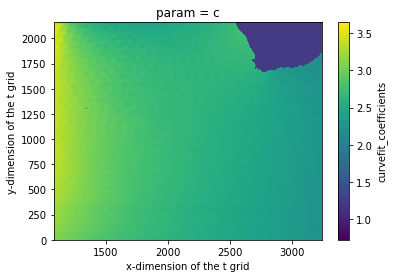

In [25]:
coeffs.curvefit_coefficients.sel(param='c').plot()

In [64]:
tide_est = xr.apply_ufunc(sinusoid_check,new_object,coeffs.curvefit_coefficients.sel(param='a'),coeffs.curvefit_coefficients.sel(param='b'),
              coeffs.curvefit_coefficients.sel(param='c'),coeffs.curvefit_coefficients.sel(param='d'),
              coeffs.curvefit_coefficients.sel(param='e'),coeffs.curvefit_coefficients.sel(param='f'),
              coeffs.curvefit_coefficients.sel(param='g'),coeffs.curvefit_coefficients.sel(param='h'),
              coeffs.curvefit_coefficients.sel(param='k'),
                          coeffs.curvefit_coefficients.sel(param='l'),
              coeffs.curvefit_coefficients.sel(param='m'),coeffs.curvefit_coefficients.sel(param='n'),
                        coeffs.curvefit_coefficients.sel(param='o'),#check_it.curvefit_coefficients.sel(param='p'),
                      #  check_it.curvefit_coefficients.sel(param='q'),check_it.curvefit_coefficients.sel(param='r'),
                      #  check_it.curvefit_coefficients.sel(param='s')
            dask='allowed')

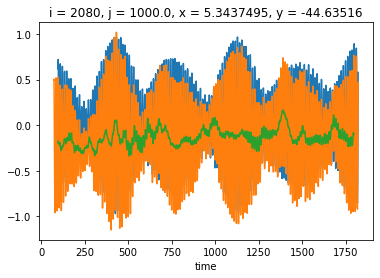

In [65]:
tide_est.isel(i=1000,j=1000,time=slice(25,2000)).plot()
(eta_timechunks.Eta.isel(i=1000,j=1000)).plot()
(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(0,-25))-tide_est.isel(i=1000,j=1000,time=slice(25,2000))).plot()

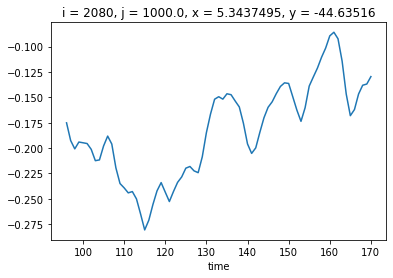

In [66]:
(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(0,100))-tide_est.isel(i=1000,j=1000,time=slice(25,125))).plot()

In [28]:
unfiltered_ps = xrft.power_spectrum(eta_timechunks.Eta.isel(time=slice(24,1000)).drop_vars('time').chunk({'time':-1}),dim=['time'],window=True)
filtered_ps = xrft.power_spectrum((eta_timechunks.Eta.isel(time=slice(24,1000))-tide_est.isel(time=slice(0,-24))).drop_vars('time'),dim=['time'],window=True)

/home/spencerj/.conda/envs/base2/envs/test_gcm_filters/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/spencerj/.conda/envs/base2/envs/test_gcm_filters/lib/python3.9/site-packages/xarray/core/indexing.py:1381: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/spencerj/.conda/envs/base2/envs/test_gcm_filters/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated i

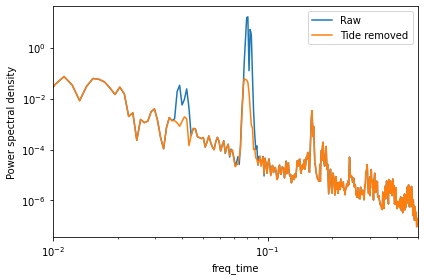

In [29]:
unfiltered_ps[292:,920:-920,850:-850].mean(['i','j']).plot(label='Raw')
filtered_ps[292:,920:-920,850:-850].mean(['i','j']).plot(label='Tide removed')

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,0.5)
plt.ylabel('Power spectral density')
plt.legend()

plt.tight_layout()
fig=plt.gcf()
fig.savefig('remove_s2_n2_m2.png')

/home/spencerj/.conda/envs/base2/envs/test_gcm_filters/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


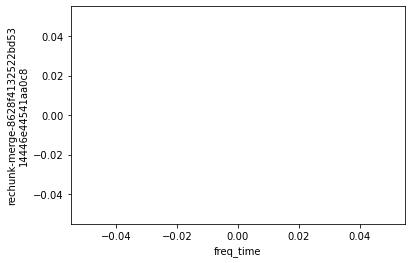

In [38]:
unfiltered_ps[292:,920:-920,850:-850].mean(['i','j']).plot()
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0.04,0.5)

In [30]:
eta_no_tide = (eta_timechunks.Eta-tide_est)

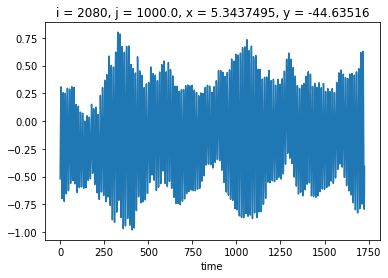

In [22]:
(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(24,2000))-tide_est.isel(i=1000,j=1000,time=slice(1,-23))).plot()

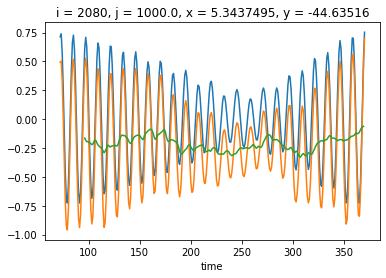

In [43]:
tide_est.isel(i=1000,j=1000,time=slice(1,300)).plot()
(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(0,300))).plot()
(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(0,299))-tide_est.isel(i=1000,j=1000,time=slice(25,324))).plot()
#eta_28detrend.Eta.isel(i=1000,j=1000).assign_coords({'time':eta_28detrend.time*3}).isel(time=slice(0,100)).plot()

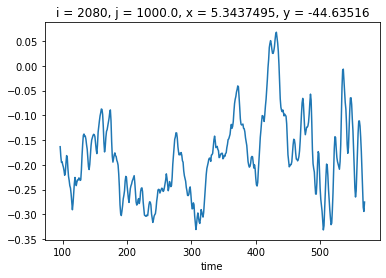

In [28]:
(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(0,499))-tide_est.isel(i=1000,j=1000,time=slice(25,524))).plot()

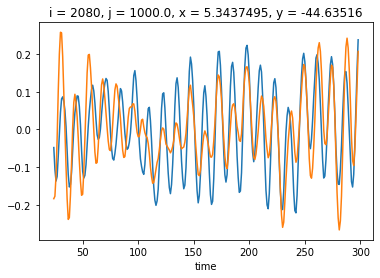

In [108]:
(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(0,299))-tide_est.isel(i=1000,j=1000,time=slice(25,324))).plot()
(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(0,299))-tide_est.isel(i=1000,j=1000,time=slice(13,312))).plot()
#(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(0,299))-tide_est.isel(i=1000,j=1000,time=slice(1,300))).plot()

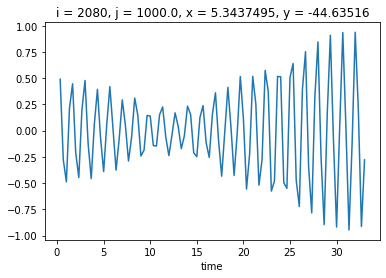

In [90]:
tide_est.isel(i=1000,j=1000,time=slice(1,100)).plot()

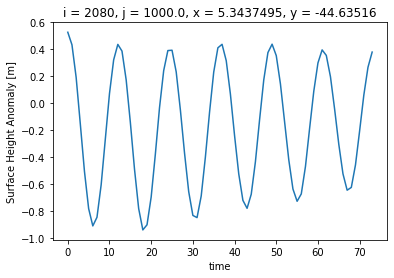

In [89]:
eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(26,100)).drop_vars('time').plot()

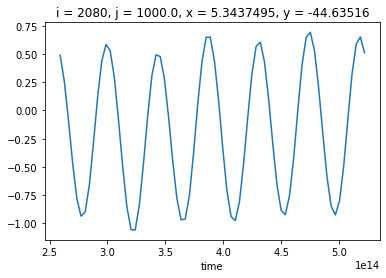

In [62]:


(eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(26,100)).drop_vars('time')-tide_est.isel(i=1000,j=1000,time=slice(1,100-25))).plot()

In [40]:
eta_timechunks.Eta.isel(i=1000,j=1000,time=slice(25,1000)).drop_vars('time')

<xarray.DataArray 'Eta' (time: 975)>
dask.array<getitem, shape=(975,), dtype=float32, chunksize=(975,), chunktype=numpy.ndarray>
Coordinates:
    i        int64 2080
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    j        float64 1e+03
    x        float32 dask.array<chunksize=(), meta=np.ndarray>
    y        float32 dask.array<chunksize=(), meta=np.ndarray>
Dimensions without coordinates: time
Attributes:
    long_name:      Surface Height Anomaly
    standard_name:  ETAN
    units:          m

In [73]:
e_no_tide = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_no_tide.zarr')

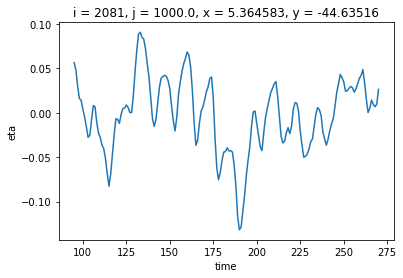

In [108]:
(e_no_tide.eta.isel(i=1001,j=1000)-e_no_tide.eta.isel(i=1001,j=1000).rolling(time=24).mean()).isel(time=slice(0,200)).plot()
fig = plt.gcf()
fig.savefig("tidal_jiggle.png")

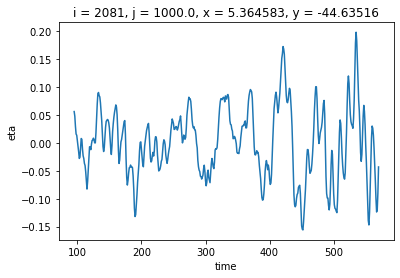

In [109]:
(e_no_tide.eta.isel(i=1001,j=1000)-e_no_tide.eta.isel(i=1001,j=1000).rolling(time=24).mean()).isel(time=slice(0,500)).plot()

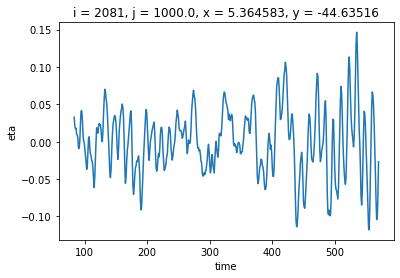

In [111]:
(e_no_tide.eta.isel(i=1001,j=1000)-e_no_tide.eta.isel(i=1001,j=1000).rolling(time=12).mean()).isel(time=slice(0,500)).plot()

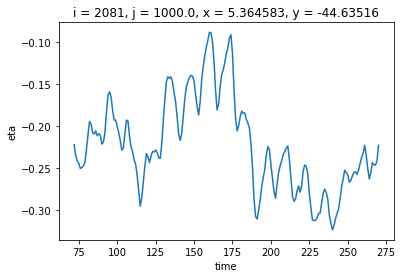

In [105]:
(e_no_tide.eta.isel(i=1001,j=1000)).isel(time=slice(0,200)).plot()

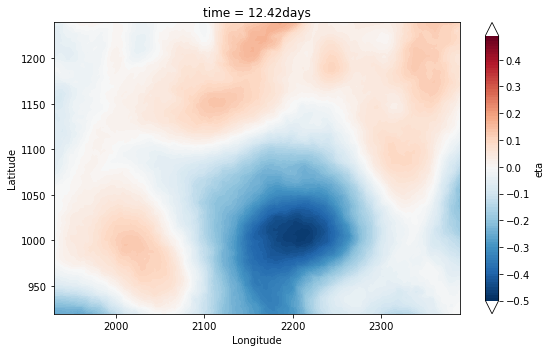

In [78]:
plt.figure(figsize=(8,5))
for tt in range(1,300):
    plt.clf()
    e_no_tide.eta[:,920:-920,850:-850].drop_vars('time').isel(time=tt).plot.pcolormesh(levels=np.arange(-0.5,0.5,0.01),rasterized=True,cbar_kwargs={'extend':'both'})
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('time = ' + '{0:.2f}'.format((e_no_tide.time.values[tt]-e_no_tide.time.values[1]).item()/24)+ 'days')
    plt.tight_layout()
    
    fig = plt.gcf()
    fig.savefig("/home/spencerj/agulhas-offline/movie/eta/fig{:03d}.jpg".format(tt))

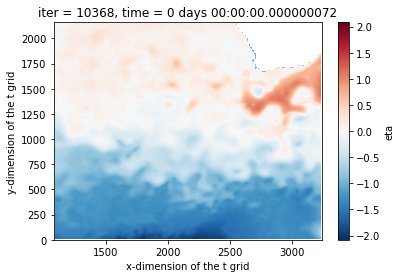

In [55]:
e_no_tide.eta.isel(time=1).plot()

In [56]:
e_no_tide.time.values[10]-e_no_tide.time.values[1]

numpy.timedelta64(9,'ns')

In [27]:
eta_merged = eta_merged.assign_coords({'time':eta_merged.time/10**9/3600})

In [33]:
tide_est.to_dataset(name='eta').to_zarr('/swot/SUM02/spencer/swot_agulhas_surf/tide_est_uns.zarr')

In [67]:
tide_est = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/tide_est.zarr').eta

In [68]:
eta_merged = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_long.zarr')

In [69]:
eta_merged = eta_merged.assign_coords({'time':eta_merged.time/10**9/3600})

In [80]:
eta_merged.Eta

<xarray.DataArray 'Eta' (time: 1752, j: 2160, i: 2160)>
dask.array<open_dataset-8e4d07df07cbd5afeeeea660de03b6c6Eta, shape=(1752, 2160, 2160), dtype=float32, chunksize=(1, 270, 540), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 1080 1081 1082 1083 1084 ... 3235 3236 3237 3238 3239
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * j        (j) float64 0.0 1.0 2.0 3.0 ... 2.157e+03 2.158e+03 2.159e+03
  * time     (time) timedelta64[ns] NaT ... 00:00:00.000001822
    x        (j, i) float32 dask.array<chunksize=(270, 540), meta=np.ndarray>
    y        (j, i) float32 dask.array<chunksize=(270, 540), meta=np.ndarray>
Attributes:
    long_name:      Surface Height Anomaly
    standard_name:  ETAN
    units:          m

In [70]:
eta_jiggle = (eta_merged.Eta - tide_est)#.isel(time=2).plot.pcolormesh()

/home/spencerj/.conda/envs/base2/envs/test_gcm_filters/lib/python3.9/site-packages/dask/array/core.py:4337: PerformanceWarning: Increasing number of chunks by factor of 108
  result = blockwise(


In [73]:
eta_jiggle.isel(time=10).plot()

KeyboardInterrupt: 

In [23]:
plt.figure(figsize=(8,5))
for tt in range(1,300):
    plt.clf()
    eta_jiggle[:,920:-920,850:-850].drop_vars('time').isel(time=tt).plot.pcolormesh(x='i',y='j',levels=np.arange(-0.5,0.5,0.01),rasterized=True,cbar_kwargs={'extend':'both'})
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('time = ' + '{0:.2f}'.format((eta_jiggle.time.values[tt]-eta_jiggle.time.values[1]).item()/24)+ 'days')
    plt.tight_layout()
    
    fig = plt.gcf()
    fig.savefig("/home/spencerj/agulhas-offline/movie/eta_filt/fig{:03d}.jpg".format(tt))

KeyboardInterrupt: 

<Figure size 576x360 with 0 Axes>

In [62]:
eta_mean = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_mean.zarr').Eta

In [63]:
eta_2 = eta_jiggle - eta_mean

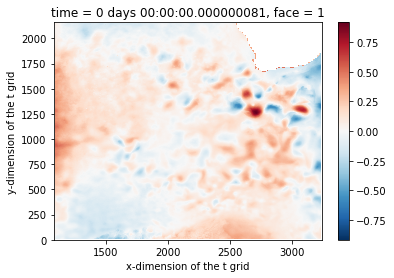

In [64]:
eta_2.isel(time=10).plot()

In [65]:
def output_binary_file(data, fname, dtype=np.dtype('>f4')):
    data.astype(dtype).tofile(fname)

In [ ]:
outdir='/swot/SUM03/spencer/eta_2/'
for i in range(0,1751):
    if np.mod(i,10)==0:
        print(i)
    nt = 10368 + i*144
    Nt = nt - 10368
    eta = eta_2.isel(time=i+1).values
    output_binary_file(eta, os.path.join(outdir, 'eta_2.%010d.data' % Nt))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [75]:
source = zarr.open('/swot/SUM02/spencer/swot_agulhas_surf/tide_est.zarr')
intermediate = "/swot/SUM02/spencer/swot_agulhas_surf/intermediate.zarr"
target = "/swot/SUM02/spencer/swot_agulhas_surf/tide_smfit.zarr"

In [81]:
target_chunks = {
    'eta': {'time':1,'j':540,'i':540},
    'x': {'i':540, 'j':540},
    'y': {'i':540, 'j':540},
    'time': None, # don't rechunk this array
    'iter': None,
    'i': None,
    'j': None,
}

In [82]:
rechunked = rechunk(source, target_chunks=target_chunks,target_store=target,max_mem='800MB',temp_store=intermediate)

In [83]:
rechunked.execute();

_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(0, 310, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(310, 620, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(620, 930, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(930, 1240, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(1240, 1550, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(1550, 1860, None)))_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(1860, 2160, None)))

_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(0, 310, None)))
_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(310, 620, None)))_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(620, 930, None)))

_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(930, 1240, None)))_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(1240, 1550, None)))_copy_chunk((slice(0, 1751

In [34]:
source = zarr.open('/swot/SUM02/spencer/swot_agulhas_surf/tide_est_uns.zarr')
intermediate = "/swot/SUM02/spencer/swot_agulhas_surf/intermediate.zarr"
target = "/swot/SUM02/spencer/swot_agulhas_surf/tide_fit.zarr"

In [35]:
target_chunks = {
    'eta': {'time':1,'j':540,'i':540},
    'x': {'i':540, 'j':540},
    'y': {'i':540, 'j':540},
    'time': None, # don't rechunk this array
    'iter': None,
    'i': None,
    'j': None,
}

In [36]:
rechunked = rechunk(source, target_chunks=target_chunks,target_store=target,max_mem='800MB',temp_store=intermediate)

In [37]:
rechunked.execute();

_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(0, 310, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(310, 620, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(620, 930, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(930, 1240, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(1240, 1550, None)))
_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(1550, 1860, None)))_copy_chunk((slice(0, 1751, None), slice(0, 180, None), slice(1860, 2160, None)))

_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(0, 310, None)))
_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(310, 620, None)))
_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(620, 930, None)))
_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(930, 1240, None)))
_copy_chunk((slice(0, 1751, None), slice(180, 360, None), slice(1240, 1550, None)))
_copy_chunk((slice(0, 17